# PHASE I




In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import files
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from keras.optimizers import SGD
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from keras.utils.vis_utils import plot_model



Bringing in the data file to assign as the dataset

---



In [ ]:
#file_name = 'adult1.csv'
#files.upload()

#read the data to dataset
url = 'https://raw.githubusercontent.com/pango3001/AI/main/project/adult1.csv'

dataset = pd.read_csv(url, delimiter=',')

Making sure our data has the right height and width

In [ ]:
# print off rows and columns to make sure the dimensions are correct
print("Rows: %s" % dataset.shape[0])
print("Columns: %s" % dataset.shape[1])

# head shows the first n amount of rows, in this case n=10
dataset.head(10)

Rows: 32561
Columns: 14


,age,workclass,fnlwgt,education,educationNum,maritalStatus,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,country,earnings
0,39,3,77516,13,13,0,0,1,1,2174,0,40,1,0
1,50,2,83311,13,13,1,1,1,1,0,0,13,1,0
2,38,1,215646,10,9,2,0,1,1,0,0,40,1,0
3,53,1,234721,6,7,1,1,2,1,0,0,40,1,0
4,28,1,338409,13,13,1,2,2,0,0,0,40,14,0
5,37,1,284582,14,14,1,2,1,0,0,0,40,1,0
6,49,1,160187,4,5,3,0,2,0,0,0,16,2,0
7,52,2,209642,10,9,1,1,1,1,0,0,45,1,1
8,31,1,45781,14,14,0,0,1,0,14084,0,50,1,1
9,42,1,159449,13,13,1,1,1,1,5178,0,40,1,1


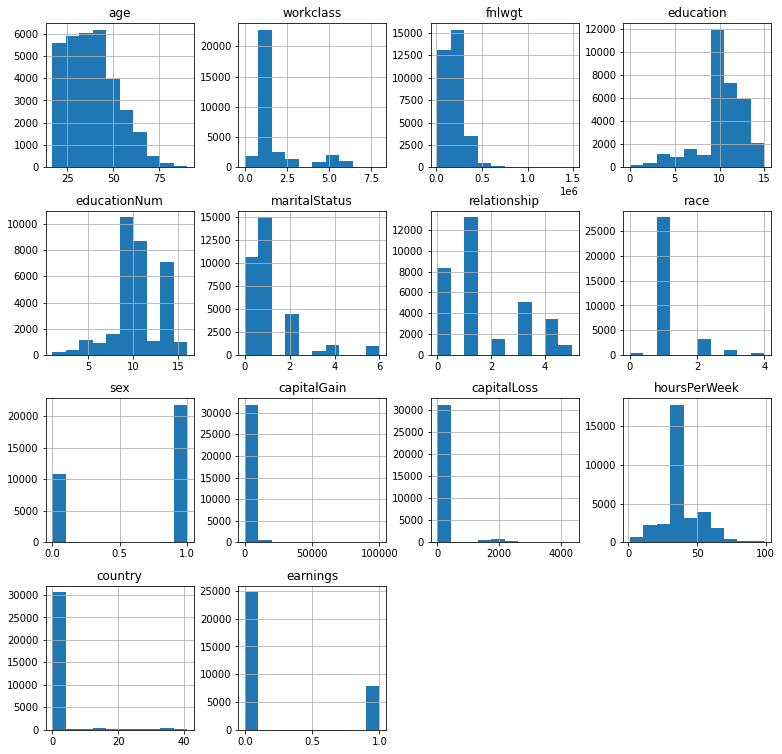

In [ ]:
plt.rcParams["figure.figsize"] = ((13,13))
dataset.hist()
plt.show()

In [ ]:
dataset.describe()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,country,earnings
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.622401,1.897784e+05,10.214766,10.080679,1.083781,1.542397,1.180093,0.669205,1077.648844,87.303830,40.437456,2.305580,0.240810
std,13.640433,1.443345,1.055500e+05,2.692418,2.572720,1.251381,1.437431,0.534266,0.470506,7385.292085,402.960219,12.347429,5.594557,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,1.000000,1.178270e+05,10.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,40.000000,1.000000,0.000000
50%,37.000000,1.000000,1.783560e+05,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,40.000000,1.000000,0.000000
75%,48.000000,1.000000,2.370510e+05,11.000000,12.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


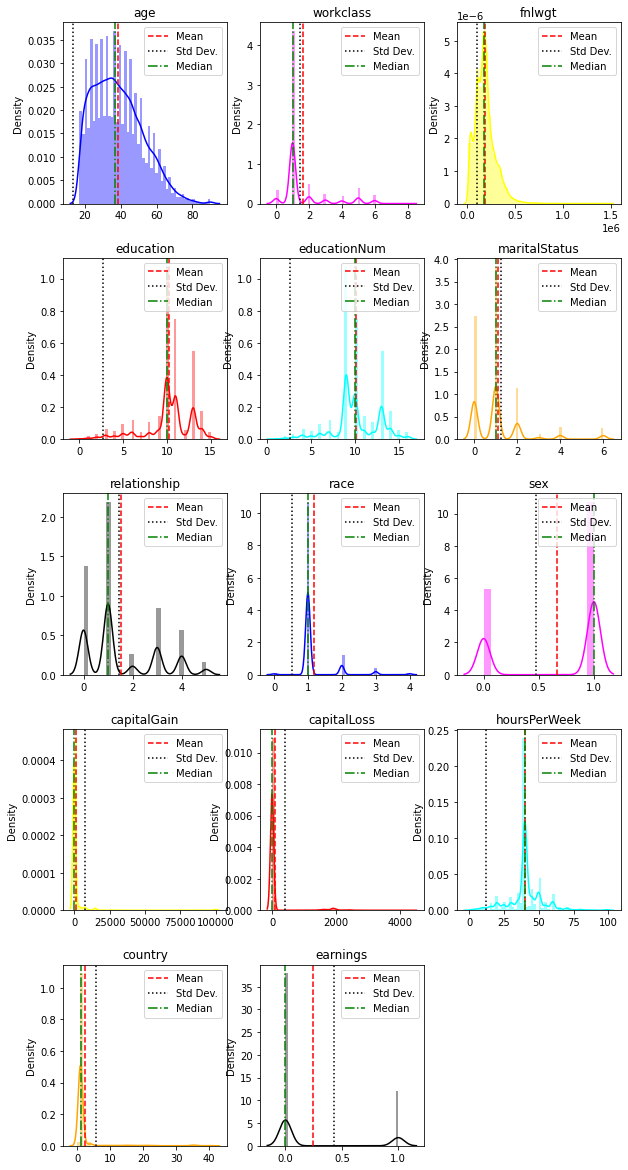

In [ ]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationNum', 'maritalStatus', 'relationship', 'race', 'sex', 'capitalGain', 'capitalLoss', 'hoursPerWeek', 'country', 'earnings']
c_length  = len(columns)
c_colors  = ["blue", "magenta", "yellow", "red", "cyan", "orange", "black", "blue", "magenta", "yellow", "red", "cyan", "orange", "black"]

import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 25))
for i, j, k in itertools.zip_longest(columns, range(c_length), c_colors):
    plt.subplot(6, 3, j+1)
    sns.distplot(dataset[i], color = k)
    plt.title(i) # Title of column represented
    plt.xlabel("") # clears the x axis label
    plt.subplots_adjust(hspace = 0.3)
    plt.axvline(dataset[i].mean(), color = "red", linestyle="dashed", label="Mean")
    plt.axvline(dataset[i].std(), color = "black", linestyle="dotted", label="Std Dev.")
    plt.axvline(dataset[i].median(), color = "green", linestyle="dashdot", label="Median")
    plt.legend(loc="upper right")

Text(0, 0.5, 'Amount')

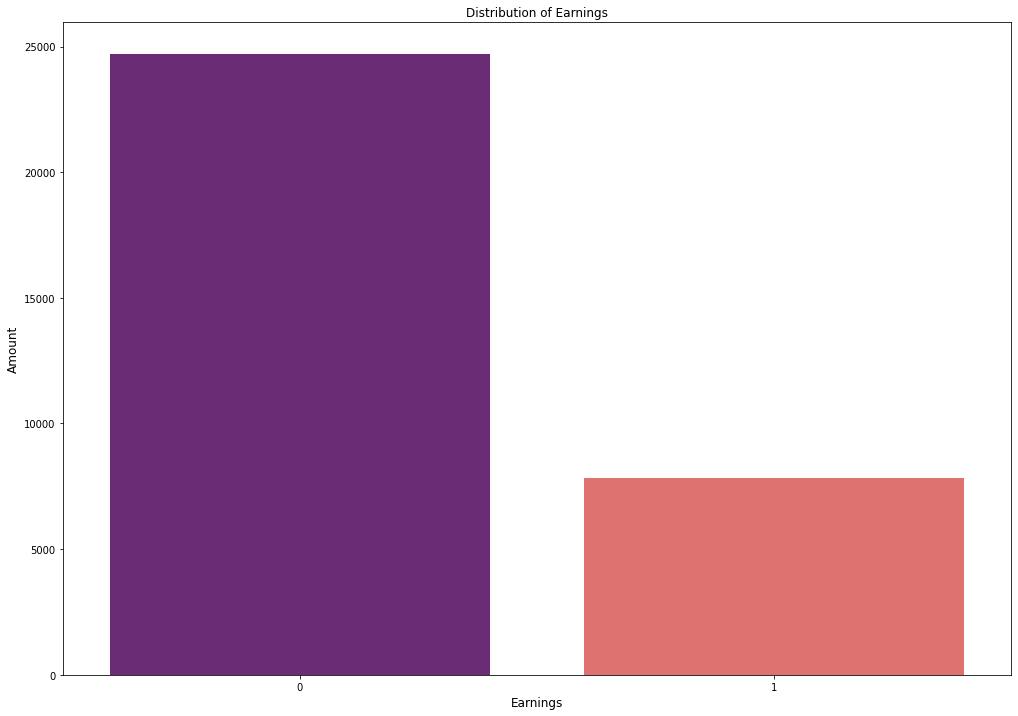

In [ ]:
# Distribution of Math Scores
plt.figure(figsize=(17, 12))
axs = sns.countplot(dataset['earnings'], palette='magma')
plt.title('Distribution of Earnings', fontsize=12)
plt.xlabel('Earnings', fontsize=12)
plt.ylabel('Amount', fontsize=12)

Next I will create a correlation map

Honestly I may change my dataset after looking at this, I would like to see more variation

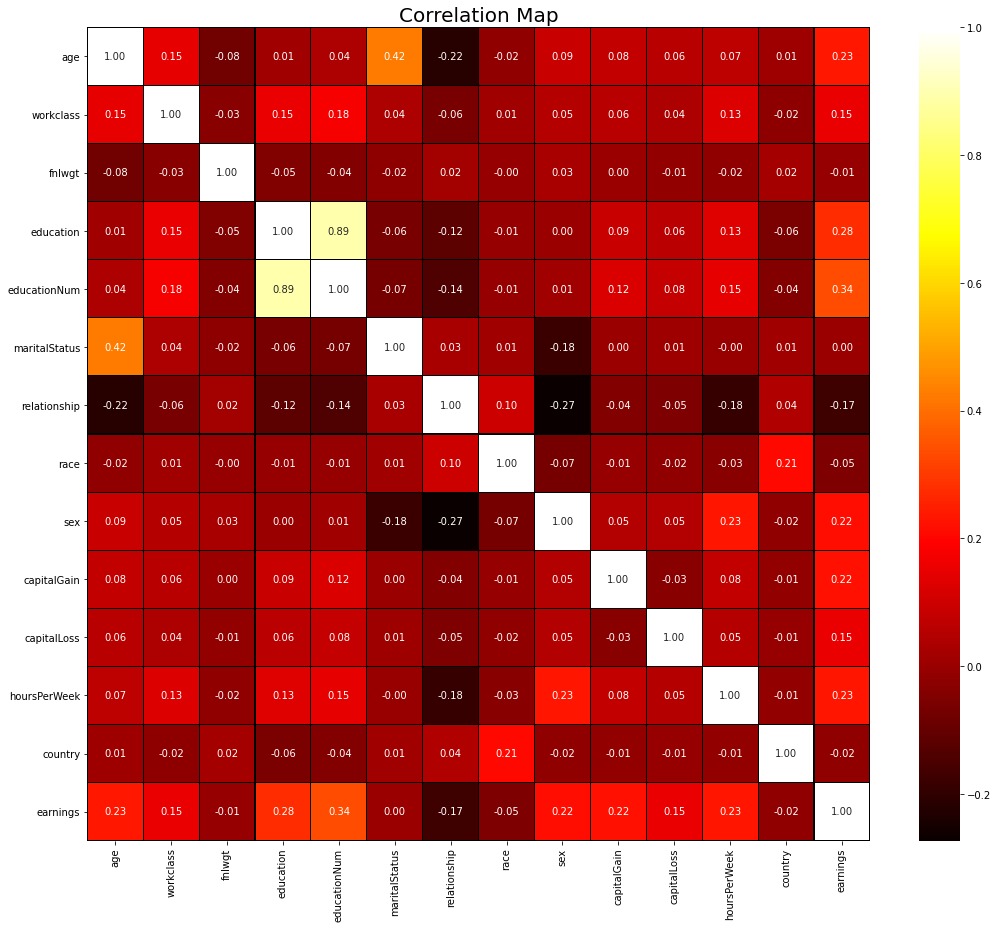

In [ ]:
# Correlation
plt.figure(figsize=(15, 13))
sns.heatmap(data=dataset.corr(), annot=True, cmap="hot", linewidths=0.1, fmt=".2f", linecolor="black")
plt.title("Correlation Map", fontsize=20)
plt.tight_layout()
plt.show()

# Honestly I may change my dataset after looking at this, I would like to see more variation

In [ ]:
from sklearn import preprocessing
# Normalizing data between (0-1)
x = dataset.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

# Insert column names back into data
normalized_df = pd.DataFrame(x_scaled, columns=dataset.columns)


# Output the first 10 rows to check data is normalized
normalized_df.head(10)


,age,workclass,fnlwgt,education,educationNum,maritalStatus,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,country,earnings
0,0.301370,0.375,0.044302,0.866667,0.800000,0.000000,0.0,0.25,1.0,0.021740,0.0,0.397959,0.024390,0.0
1,0.452055,0.250,0.048238,0.866667,0.800000,0.166667,0.2,0.25,1.0,0.000000,0.0,0.122449,0.024390,0.0
2,0.287671,0.125,0.138113,0.666667,0.533333,0.333333,0.0,0.25,1.0,0.000000,0.0,0.397959,0.024390,0.0
3,0.493151,0.125,0.151068,0.400000,0.400000,0.166667,0.2,0.50,1.0,0.000000,0.0,0.397959,0.024390,0.0
4,0.150685,0.125,0.221488,0.866667,0.800000,0.166667,0.4,0.50,0.0,0.000000,0.0,0.397959,0.341463,0.0
5,0.273973,0.125,0.184932,0.933333,0.866667,0.166667,0.4,0.25,0.0,0.000000,0.0,0.397959,0.024390,0.0
6,0.438356,0.125,0.100448,0.266667,0.266667,0.500000,0.0,0.50,0.0,0.000000,0.0,0.153061,0.048780,0.0
7,0.479452,0.250,0.134036,0.666667,0.533333,0.166667,0.2,0.25,1.0,0.000000,0.0,0.448980,0.024390,1.0
8,0.191781,0.125,0.022749,0.933333,0.866667,0.000000,0.0,0.25,0.0,0.140841,0.0,0.500000,0.024390,1.0
9,0.342466,0.125,0.099947,0.866667,0.800000,0.166667,0.2,0.25,1.0,0.051781,0.0,0.397959,0.024390,1.0


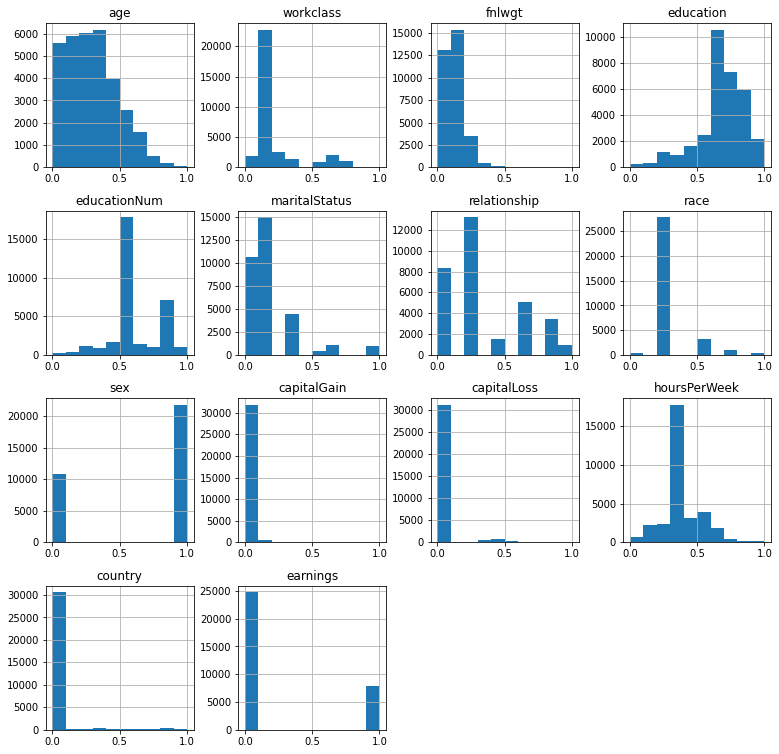

In [ ]:
normalized_df.hist()
plt.show()

#Illistrating the Nueral Networks


In [ ]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    #source: https://gist.github.com/craffel/2d727968c3aaebd10359
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

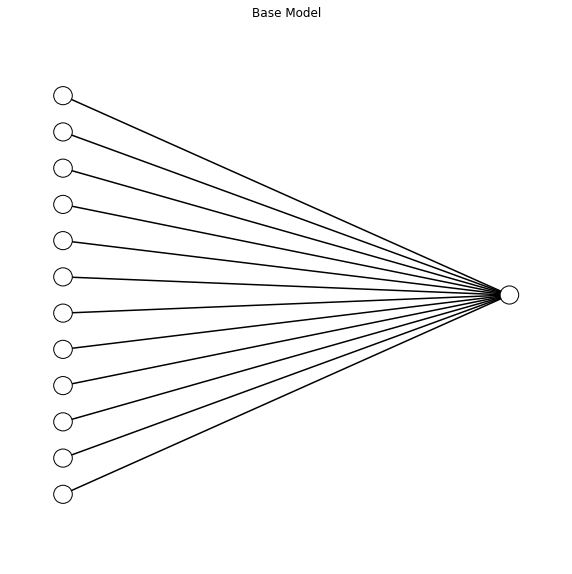

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.axis('off')
ax.set_title("Base Model")
draw_neural_net(ax, .1, .9, .1, .9, [12, 1])

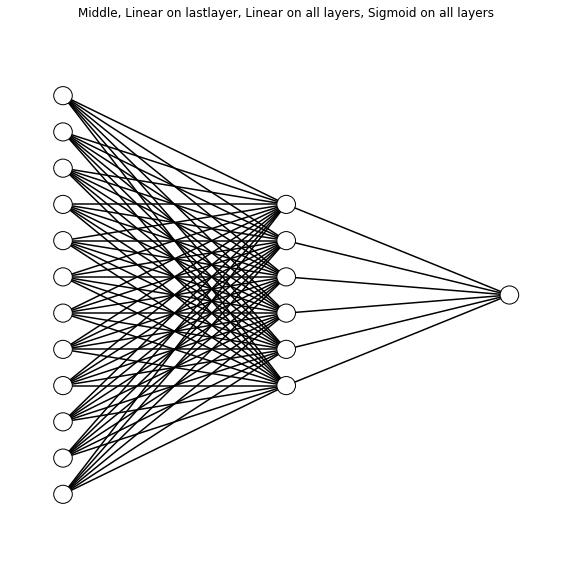

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.axis('off')
ax.set_title("Middle, Linear on lastlayer, Linear on all layers, Sigmoid on all layers")
draw_neural_net(ax, .1, .9, .1, .9, [12,6, 1])

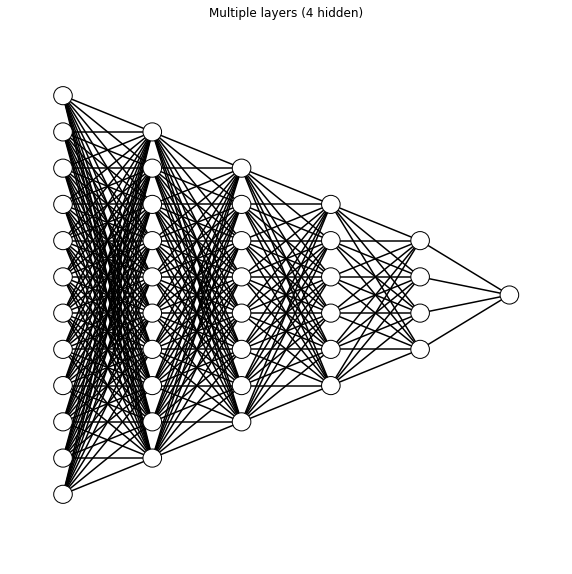

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.axis('off')
ax.set_title("Multiple layers (4 hidden)")
draw_neural_net(ax, .1, .9, .1, .9, [12,10,8,6,4, 1])

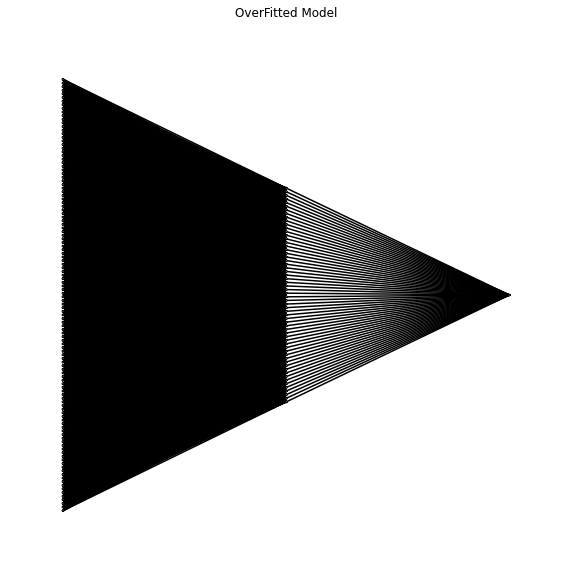

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.axis('off')
ax.set_title("OverFitted Model")
draw_neural_net(ax, .1, .9, .1, .9, [120,60, 1])

# PHASE II

Splitting my data into training and validation sets

In [ ]:
# Shuffling the dataset
dataset = dataset.sample(frac=1).reset_index(drop=True)

# Convert Pandas DataSet to Numpy Array
dataset_np = dataset.values
X = dataset.drop('earnings', axis='columns').values
Y = dataset['earnings'].values

In [ ]:
# Index for 30%
index_30percent = int(0.3 * len(dataset_np[:, 0]))  
print(index_30percent)

# Split into validation (30%) and training (70%)
XVALID = X[:index_30percent, :]
YVALID = Y[:index_30percent]
XTRAIN = X[index_30percent:, :]
YTRAIN = Y[index_30percent:]

9768


In [ ]:
# Mean normalization
Xmin = XTRAIN.min(axis = 0) 
Xmax = XTRAIN.max(axis = 0) 
mean = XTRAIN.mean(axis = 0)
XTRAIN = (XTRAIN - mean) / (Xmax - Xmin)
XVALID = (XVALID - mean) / (Xmax - Xmin)

# Rescaling
Ymax = YTRAIN.max()
YTRAIN = YTRAIN / Ymax
YVALID = YVALID / Ymax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae786cfef0>,
      dtype=object)

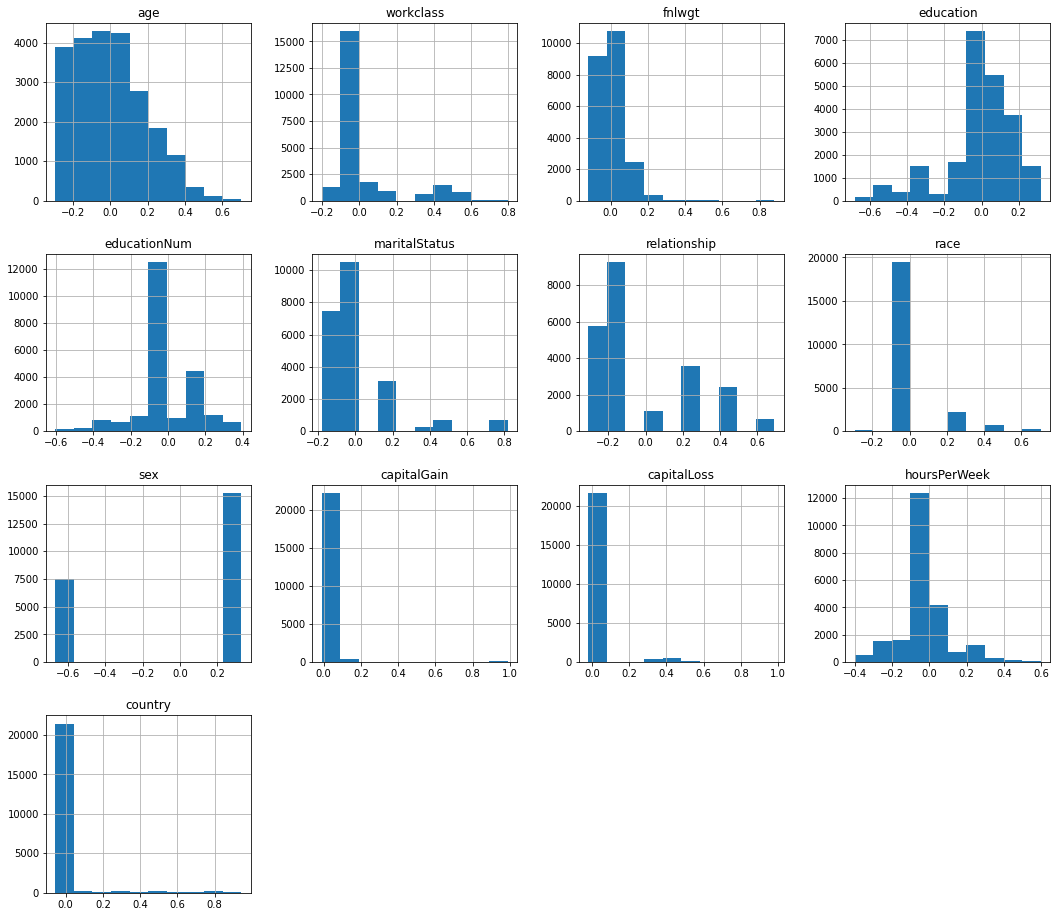

In [ ]:
train_norm = pd.DataFrame(data=XTRAIN)
train_norm.columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationNum', 'maritalStatus', 'relationship', 'race', 'sex', 'capitalGain', 'capitalLoss', 'hoursPerWeek', 'country']
train_norm.hist(figsize=(18,16))

Next we will set up the models

In [ ]:
# Setting up the models

# Base model 1 input, 1 output
model_base = Sequential([ 
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=1, activation='sigmoid')
])

# adding a middle layer
model_middle = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])

# adding another hidden layer
model_4_layers = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])

# adding multiple hidden layers
model_mult_layers = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=10, activation='relu'),
                    Dense(units=8, activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=4, activation='relu'),
                    Dense(units=1, activation='sigmoid')
])

# linear activation on last layer
model_linear_last = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='relu'),
                    Dense(units=6, activation='relu'),
                    Dense(units=1, activation='linear')
])

# linear activation on all layers
model_linear_all = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='linear'),
                    Dense(units=6, activation='linear'),
                    Dense(units=1, activation='linear')
])

# sigmoid activation on all layers
model_sigmoid_all = Sequential([
                    Dense(units=12, input_dim = len(XTRAIN[0, :]), activation='sigmoid'),
                    Dense(units=6, activation='sigmoid'),
                    Dense(units=1, activation='sigmoid')
])

# Overfitted model
model_overfitted = Sequential([
                    Dense(units=120, input_dim = len(XTRAIN[0, :]), activation='linear'),
                    Dense(units=60, activation='linear'),
                    Dense(units=1, activation='linear')
])




In [ ]:
model_base.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 12)                168       
_________________________________________________________________
dense_82 (Dense)             (None, 1)                 13        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


Now we must compile each model to prepare it for the .fit() function

In [ ]:
model_base.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_middle.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_4_layers.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_mult_layers.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_linear_last.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_linear_all.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_sigmoid_all.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model_overfitted.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
# Learn the model from training set
history1 = model_base.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 1s 2ms/step - loss: 0.5328 - accuracy: 0.7605 - val_loss: 0.4430 - val_accuracy: 0.7817
Epoch 2/100
357/357 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.8028 - val_loss: 0.4044 - val_accuracy: 0.8159
Epoch 3/100
357/357 [==============================] - 1s 1ms/step - loss: 0.4032 - accuracy: 0.8134 - val_loss: 0.3918 - val_accuracy: 0.8201
Epoch 4/100
357/357 [==============================] - 1s 1ms/step - loss: 0.3925 - accuracy: 0.8172 - val_loss: 0.3822 - val_accuracy: 0.8248
Epoch 5/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3830 - accuracy: 0.8213 - val_loss: 0.3730 - val_accuracy: 0.8299
Epoch 6/100
357/357 [==============================] - 1s 1ms/step - loss: 0.3736 - accuracy: 0.8259 - val_loss: 0.3635 - val_accuracy: 0.8349
Epoch 7/100
357/357 [==============================] - 1s 1ms/step - loss: 0.3645 - accuracy: 0.8318 - val_loss: 0.3544 - val_accuracy: 0.8382

In [ ]:
history2 = model_middle.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 1s 2ms/step - loss: 0.5240 - accuracy: 0.7573 - val_loss: 0.4359 - val_accuracy: 0.7590
Epoch 2/100
357/357 [==============================] - 1s 1ms/step - loss: 0.4108 - accuracy: 0.8022 - val_loss: 0.3821 - val_accuracy: 0.8225
Epoch 3/100
357/357 [==============================] - 1s 1ms/step - loss: 0.3708 - accuracy: 0.8234 - val_loss: 0.3500 - val_accuracy: 0.8370
Epoch 4/100
357/357 [==============================] - 1s 1ms/step - loss: 0.3492 - accuracy: 0.8349 - val_loss: 0.3362 - val_accuracy: 0.8450
Epoch 5/100
357/357 [==============================] - 1s 1ms/step - loss: 0.3399 - accuracy: 0.8404 - val_loss: 0.3302 - val_accuracy: 0.8484
Epoch 6/100
357/357 [==============================] - 1s 1ms/step - loss: 0.3361 - accuracy: 0.8432 - val_loss: 0.3277 - val_accuracy: 0.8485
Epoch 7/100
357/357 [==============================] - 1s 1ms/step - loss: 0.3337 - accuracy: 0.8438 - val_loss: 0.3261 - val_accuracy: 0.8487

In [ ]:
history3 = model_4_layers.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 1s 2ms/step - loss: 0.5135 - accuracy: 0.7675 - val_loss: 0.4102 - val_accuracy: 0.8123
Epoch 2/100
357/357 [==============================] - 1s 1ms/step - loss: 0.3928 - accuracy: 0.8167 - val_loss: 0.3690 - val_accuracy: 0.8308
Epoch 3/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3614 - accuracy: 0.8295 - val_loss: 0.3438 - val_accuracy: 0.8418
Epoch 4/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3443 - accuracy: 0.8376 - val_loss: 0.3332 - val_accuracy: 0.8465
Epoch 5/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3365 - accuracy: 0.8423 - val_loss: 0.3304 - val_accuracy: 0.8472
Epoch 6/100
357/357 [==============================] - 1s 1ms/step - loss: 0.3329 - accuracy: 0.8426 - val_loss: 0.3261 - val_accuracy: 0.8489
Epoch 7/100
357/357 [==============================] - 1s 1ms/step - loss: 0.3311 - accuracy: 0.8441 - val_loss: 0.3285 - val_accuracy: 0.8486

In [ ]:
history4 = model_mult_layers.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4885 - accuracy: 0.7770 - val_loss: 0.3873 - val_accuracy: 0.8249
Epoch 2/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3733 - accuracy: 0.8267 - val_loss: 0.3537 - val_accuracy: 0.8392
Epoch 3/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3478 - accuracy: 0.8379 - val_loss: 0.3358 - val_accuracy: 0.8480
Epoch 4/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3377 - accuracy: 0.8415 - val_loss: 0.3295 - val_accuracy: 0.8469
Epoch 5/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3341 - accuracy: 0.8433 - val_loss: 0.3269 - val_accuracy: 0.8487
Epoch 6/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3314 - accuracy: 0.8434 - val_loss: 0.3244 - val_accuracy: 0.8503
Epoch 7/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3293 - accuracy: 0.8441 - val_loss: 0.3264 - val_accuracy: 0.8495

In [ ]:
history5 = model_linear_last.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4684 - accuracy: 0.7844 - val_loss: 0.4299 - val_accuracy: 0.8114
Epoch 2/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4240 - accuracy: 0.8106 - val_loss: 0.3918 - val_accuracy: 0.8223
Epoch 3/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4028 - accuracy: 0.8199 - val_loss: 0.3809 - val_accuracy: 0.8289
Epoch 4/100
357/357 [==============================] - 1s 1ms/step - loss: 0.3818 - accuracy: 0.8258 - val_loss: 0.3701 - val_accuracy: 0.8327
Epoch 5/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3841 - accuracy: 0.8278 - val_loss: 0.3694 - val_accuracy: 0.8361
Epoch 6/100
357/357 [==============================] - 1s 2ms/step - loss: 0.3743 - accuracy: 0.8323 - val_loss: 0.3750 - val_accuracy: 0.8389
Epoch 7/100
357/357 [==============================] - 1s 1ms/step - loss: 0.3694 - accuracy: 0.8329 - val_loss: 0.3602 - val_accuracy: 0.8415

In [ ]:
history6 = model_linear_all.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 1s 2ms/step - loss: 0.6087 - accuracy: 0.7705 - val_loss: 0.4636 - val_accuracy: 0.8055
Epoch 2/100
357/357 [==============================] - 1s 1ms/step - loss: 0.4338 - accuracy: 0.8013 - val_loss: 0.4292 - val_accuracy: 0.8085
Epoch 3/100
357/357 [==============================] - 1s 1ms/step - loss: 0.4604 - accuracy: 0.7803 - val_loss: 0.5668 - val_accuracy: 0.7067
Epoch 4/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4672 - accuracy: 0.7871 - val_loss: 0.4272 - val_accuracy: 0.8005
Epoch 5/100
357/357 [==============================] - 1s 1ms/step - loss: 0.4238 - accuracy: 0.8034 - val_loss: 0.4210 - val_accuracy: 0.8087
Epoch 6/100
357/357 [==============================] - 1s 1ms/step - loss: 0.4263 - accuracy: 0.8075 - val_loss: 0.5330 - val_accuracy: 0.7610
Epoch 7/100
357/357 [==============================] - 1s 1ms/step - loss: 0.4707 - accuracy: 0.7934 - val_loss: 0.4432 - val_accuracy: 0.8077

In [ ]:
history7 = model_sigmoid_all.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 1s 2ms/step - loss: 0.5518 - accuracy: 0.7594 - val_loss: 0.5371 - val_accuracy: 0.7586
Epoch 2/100
357/357 [==============================] - 1s 1ms/step - loss: 0.5185 - accuracy: 0.7594 - val_loss: 0.4939 - val_accuracy: 0.7586
Epoch 3/100
357/357 [==============================] - 1s 1ms/step - loss: 0.4696 - accuracy: 0.7683 - val_loss: 0.4453 - val_accuracy: 0.7868
Epoch 4/100
357/357 [==============================] - 1s 1ms/step - loss: 0.4366 - accuracy: 0.7972 - val_loss: 0.4239 - val_accuracy: 0.8036
Epoch 5/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4244 - accuracy: 0.8042 - val_loss: 0.4154 - val_accuracy: 0.8118
Epoch 6/100
357/357 [==============================] - 1s 1ms/step - loss: 0.4193 - accuracy: 0.8060 - val_loss: 0.4113 - val_accuracy: 0.8135
Epoch 7/100
357/357 [==============================] - 1s 1ms/step - loss: 0.4162 - accuracy: 0.8082 - val_loss: 0.4084 - val_accuracy: 0.8157

In [ ]:
history8 = model_overfitted.fit(XTRAIN, YTRAIN, epochs=100, batch_size=64, validation_data = (XVALID, YVALID),verbose=1)

Epoch 1/100
357/357 [==============================] - 1s 2ms/step - loss: 0.5263 - accuracy: 0.7594 - val_loss: 0.4221 - val_accuracy: 0.8078
Epoch 2/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4415 - accuracy: 0.8074 - val_loss: 0.4221 - val_accuracy: 0.8173
Epoch 3/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4316 - accuracy: 0.8137 - val_loss: 0.4829 - val_accuracy: 0.8194
Epoch 4/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4391 - accuracy: 0.8131 - val_loss: 0.4456 - val_accuracy: 0.8175
Epoch 5/100
357/357 [==============================] - 1s 2ms/step - loss: 0.5018 - accuracy: 0.7784 - val_loss: 0.4603 - val_accuracy: 0.7984
Epoch 6/100
357/357 [==============================] - 1s 2ms/step - loss: 0.5402 - accuracy: 0.7726 - val_loss: 0.4230 - val_accuracy: 0.8091
Epoch 7/100
357/357 [==============================] - 1s 2ms/step - loss: 0.4254 - accuracy: 0.8098 - val_loss: 0.4263 - val_accuracy: 0.8184

In [ ]:
def get_accuracy(model):
    scores = model.evaluate(XTRAIN, YTRAIN)
    percent = (scores[1] * 100.0)
    formatted_percent = "{:.2f}".format(percent)
    print("Training set Accuracy: ", formatted_percent , "%")

In [ ]:
get_accuracy(model_base)

713/713 [==============================] - 1s 898us/step - loss: 0.3196 - accuracy: 0.8511
Training set Accuracy:  85.11 %


In [ ]:
get_accuracy(model_middle)

713/713 [==============================] - 1s 907us/step - loss: 0.3169 - accuracy: 0.8506
Training set Accuracy:  85.06 %


In [ ]:
get_accuracy(model_mult_layers)

713/713 [==============================] - 1s 878us/step - loss: 0.3127 - accuracy: 0.8518
Training set Accuracy:  85.18 %


In [ ]:
get_accuracy(model_4_layers)

713/713 [==============================] - 1s 877us/step - loss: 0.3171 - accuracy: 0.8502
Training set Accuracy:  85.02 %


In [ ]:
get_accuracy(model_linear_last)

713/713 [==============================] - 1s 808us/step - loss: 0.3237 - accuracy: 0.8495
Training set Accuracy:  84.95 %


In [ ]:
get_accuracy(model_linear_all)

713/713 [==============================] - 1s 833us/step - loss: 0.4111 - accuracy: 0.8170
Training set Accuracy:  81.70 %


In [ ]:
get_accuracy(model_sigmoid_all)

713/713 [==============================] - 1s 826us/step - loss: 0.3271 - accuracy: 0.8444
Training set Accuracy:  84.44 %


In [ ]:
get_accuracy(model_overfitted)

713/713 [==============================] - 1s 933us/step - loss: 0.4808 - accuracy: 0.7887
Training set Accuracy:  78.87 %


In [ ]:
def learning_curve(m_history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    ax1.plot(m_history.history['loss'])
    ax1.plot(m_history.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Training loss data', 'Validation loss data'], loc='upper right')

    ax2.plot(m_history.history['accuracy'])
    ax2.plot(m_history.history['val_accuracy'])
    ax2.set_title('Model Accuracy')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Training accuracy data', 'Validation accuracy data'], loc='lower right')

    fig.show()

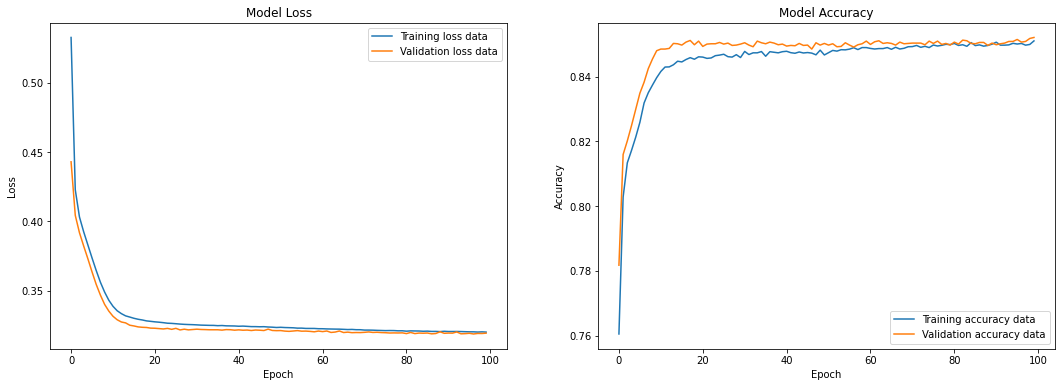

In [ ]:
learning_curve(history1)

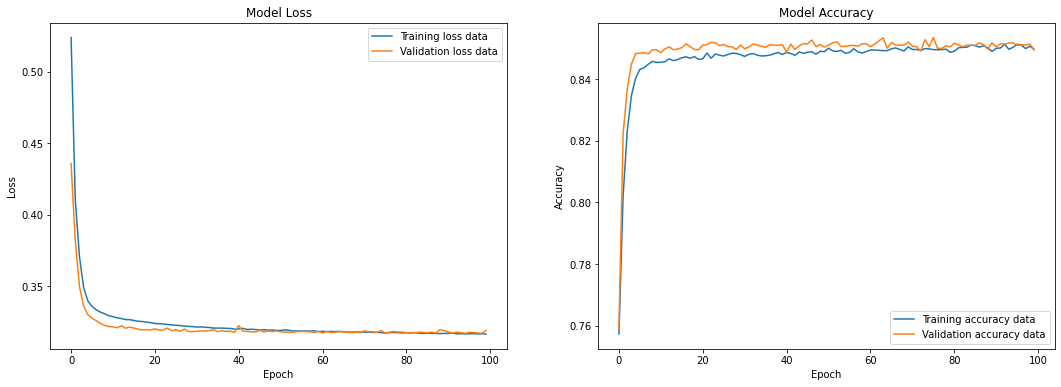

In [ ]:
learning_curve(history2)

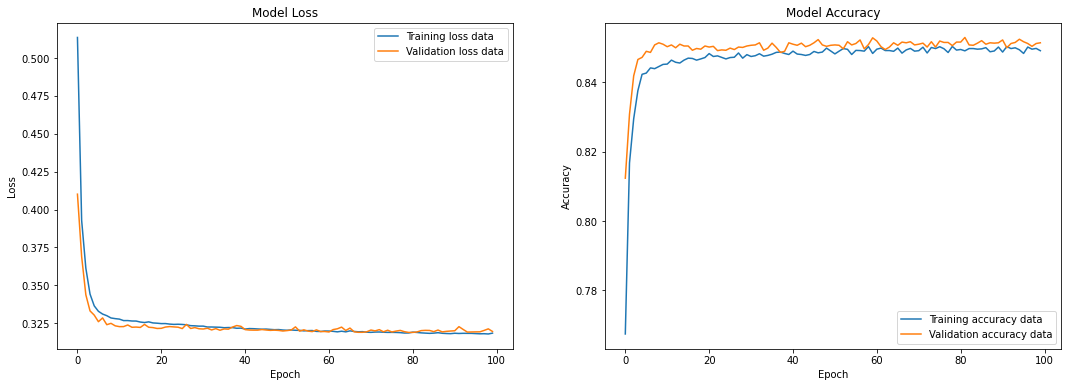

In [ ]:
learning_curve(history3)

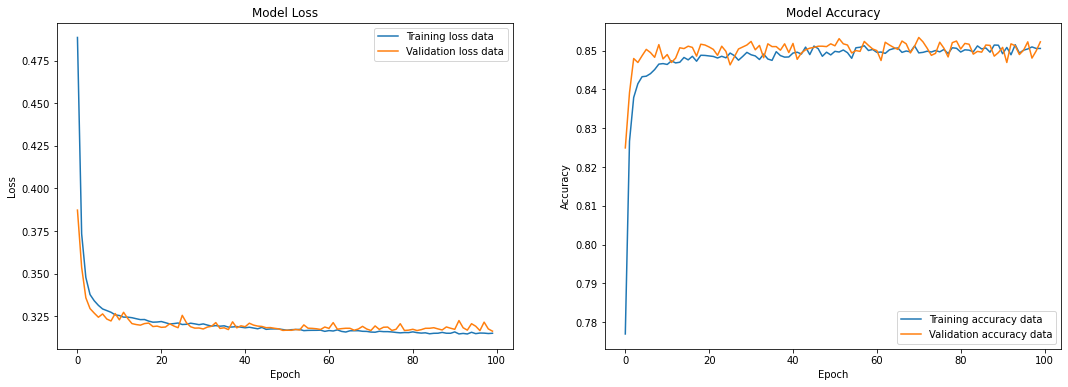

In [ ]:
learning_curve(history4)

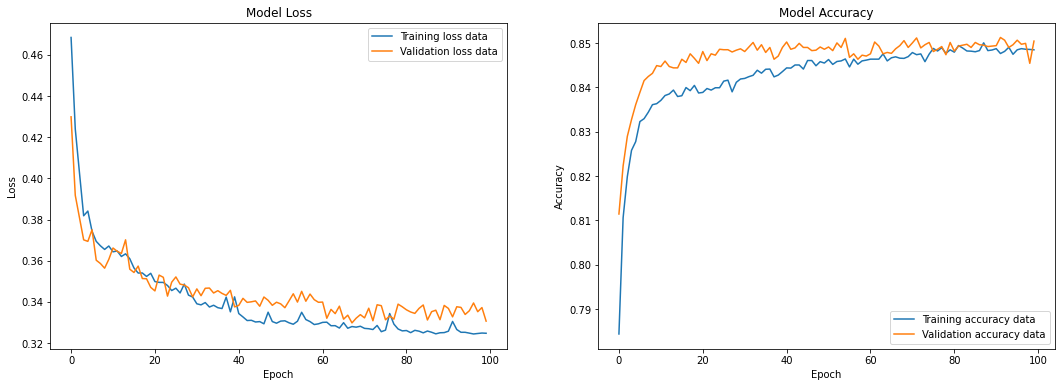

In [ ]:
learning_curve(history5)

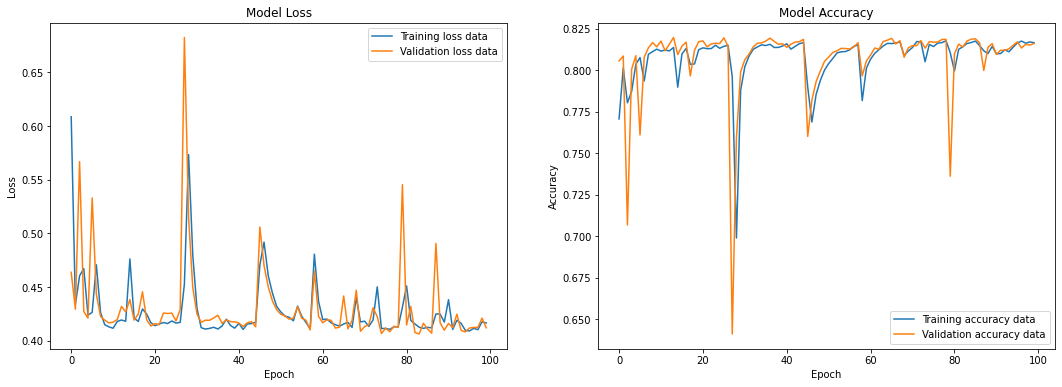

In [ ]:
learning_curve(history6)

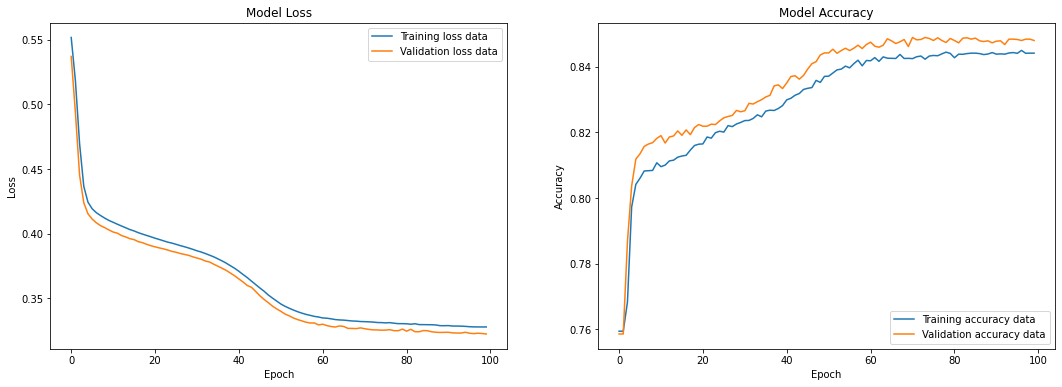

In [ ]:
learning_curve(history7)

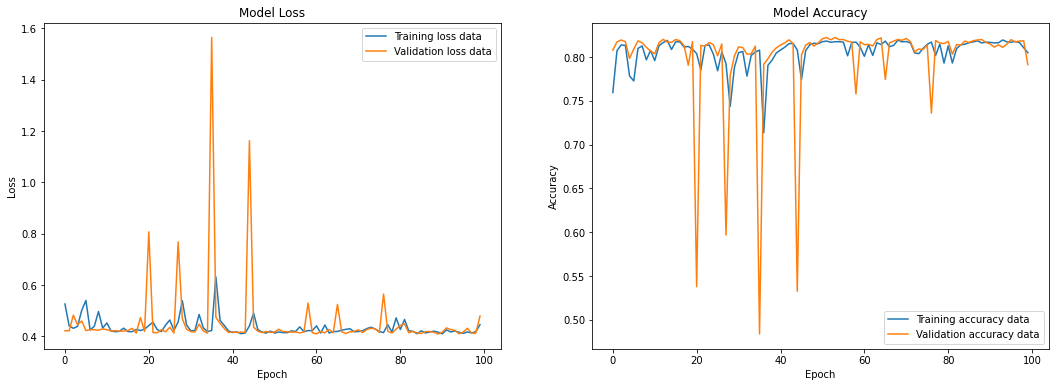

In [ ]:
learning_curve(history8)

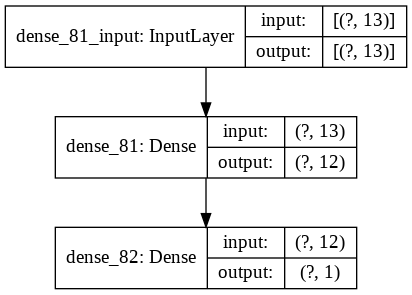

In [ ]:
plot_model(model_base, show_shapes=True, show_layer_names=True)

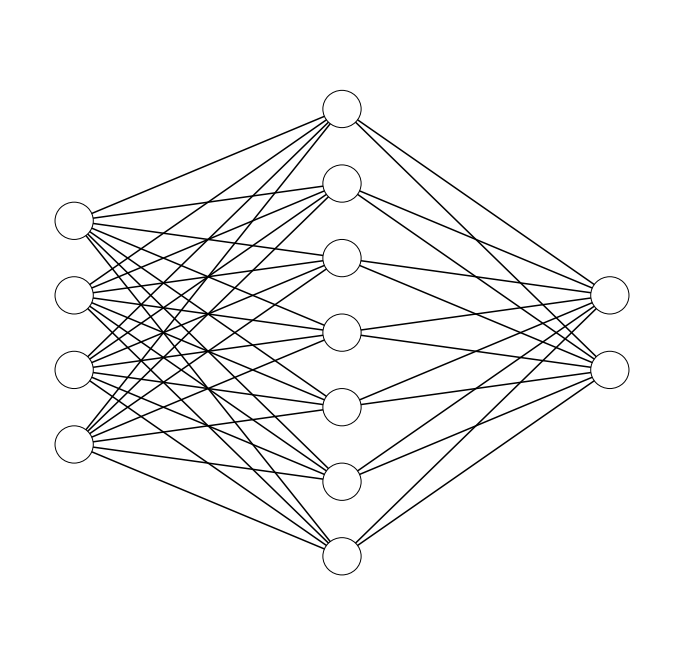

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [4, 7, 2])


#Phase III

In [ ]:
X = dataset[:, :-1]
Y = dataset[:, -1]
#from binary classification activity
print ('True Validation Data:')
print(Y[:10])
prediction = model.predict(X)
print ('Prediction:')
print(prediction[0:10].T)

TypeError: ignored

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(Y, prediction.round())
precision = precision_score(Y, prediction.round())
recall = recall_score(Y, prediction.round())
f1score = f1_score(Y, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))